In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# for hypothesis testing
import scipy.stats as stats

# BUSINESS PROBLEM-1

In [3]:
loan=pd.read_csv('LoansData.csv')

In [4]:
loan.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [6]:
loan.size

35000

In [7]:
loan.isnull().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

In [8]:
loan.columns=loan.columns.str.replace('.','_')
loan.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [9]:
loan.Interest_Rate=loan.Interest_Rate.str.replace('%','')

In [10]:
loan.Debt_To_Income_Ratio=loan.Debt_To_Income_Ratio.str.replace('%','')

In [11]:
loan.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99,36 months,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71,36 months,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [12]:
loan.dtypes

Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                      object
Loan_Length                        object
Loan_Purpose                       object
Debt_To_Income_Ratio               object
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

In [13]:
loan.Interest_Rate = pd.to_numeric(loan.Interest_Rate)

In [14]:
loan.Debt_To_Income_Ratio = pd.to_numeric(loan.Debt_To_Income_Ratio)

In [15]:
loan.describe(percentiles=np.arange(0,1,0.1))

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months
count,2499.000000,2499.000000,2498.000000,2499.000000,2499.000000,2497.000000,2497.000000,2497.000000
mean,12405.462185,12002.374186,13.065388,15.380420,5688.931321,10.072887,15223.184622,0.906688
std,7802.933666,7746.767348,4.177201,7.505052,3963.118185,4.507416,18281.015258,1.231149
min,1000.000000,-0.010000,5.420000,0.000000,588.500000,2.000000,0.000000,0.000000
0%,1000.000000,-0.010000,5.420000,0.000000,588.500000,2.000000,0.000000,0.000000
10%,4000.000000,3600.000000,7.620000,5.308000,2600.000000,5.000000,2298.800000,0.000000
20%,5440.000000,5000.000000,8.900000,8.516000,3250.000000,6.000000,4641.600000,0.000000
30%,7170.000000,6975.000000,10.740000,11.030000,3750.000000,7.000000,6560.800000,0.000000
40%,9000.000000,8799.232000,12.120000,13.182000,4333.330000,8.000000,8575.800000,0.000000
50%,10000.000000,10000.000000,13.110000,15.320000,5000.000000,9.000000,10948.000000,0.000000


In [16]:
# employment length column is not required for this problem 
loan=loan.drop(columns='Employment_Length')

In [17]:
loan.isna().sum()

Amount_Requested                  1
Amount_Funded_By_Investors        1
Interest_Rate                     2
Loan_Length                       0
Loan_Purpose                      0
Debt_To_Income_Ratio              1
State                             0
Home_Ownership                    1
Monthly_Income                    1
FICO_Range                        2
Open_CREDIT_Lines                 3
Revolving_CREDIT_Balance          3
Inquiries_in_the_Last_6_Months    3
dtype: int64

In [177]:
# null values count is very less ,so drop the rows with nullvalues
loan=loan.dropna()
loan['FICO_Score']=((loan.FICO_Range.str[0:3].astype(int))+(loan.FICO_Range.str[4:].astype(int)))/2

In [19]:
loan.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,FICO_Score
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,737.0
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,717.0
2,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,692.0
3,10000.0,9975.0,9.99,36 months,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,697.0
4,12000.0,12000.0,11.71,36 months,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,697.0


##### a. Interest rate is varied for different loan amounts (Less interest charged for high loan amounts)

In [21]:
# H0 : Interest rate is same for every loan amount
# Ha : Interest rate is dependent on loan amount

In [22]:
stats.pearsonr(loan.Interest_Rate,loan.Amount_Funded_By_Investors)

PearsonRResult(statistic=0.33581940642785874, pvalue=1.1396807200527619e-66)

In [23]:
# p-value = 1.13e-66 which is less than 0.05 , so we can reject null hypothesis and accept alternate 
# hypothesis. With 95 percent confidence interval, we can say that Interest rate is varied for different loan amounts.

##### b. Loan length is directly effecting intrest rate.

In [25]:
# H0 : loan length is constant and does not vary with the interest rate
# Ha : loan length is not constant and does not vary with the interest rate

In [26]:
loan.Loan_Length.value_counts()

Loan_Length
36 months    1941
60 months     548
Name: count, dtype: int64

In [27]:
length_36months = loan.loc[loan['Loan_Length'] == '36 months', 'Interest_Rate']
length_60months = loan.loc[loan['Loan_Length'] == '60 months', 'Interest_Rate']

In [28]:
length_36months.mean()

12.128907779495107

In [29]:
length_60months.mean()

16.407463503649634

In [30]:
stats.ttest_ind(length_60months,length_36months)

TtestResult(statistic=23.37963620691779, pvalue=1.9132344351585912e-109, df=2487.0)

In [31]:
# p-value is less than 0.05 , so we can reject null hypothesis and accept alternate hypothesis. 
# With 95 percent confidence interval,we can say that Loan length is directly effecting interest rate.

##### c. Inrest rate varies for different purpose of loans

In [33]:
loan.Loan_Purpose.value_counts().index

Index(['debt_consolidation', 'credit_card', 'other', 'home_improvement',
       'major_purchase', 'small_business', 'car', 'wedding', 'medical',
       'moving', 'vacation', 'house', 'educational', 'renewable_energy'],
      dtype='object', name='Loan_Purpose')

In [34]:
interest_rates = {}

# List of unique loan purposes
loan_purposes = ['debt_consolidation', 'credit_card', 'other', 'home_improvement',
                 'major_purchase', 'small_business', 'car', 'wedding', 'medical',
                 'moving', 'vacation', 'house', 'educational', 'renewable_energy']

# Populate the dictionary with variables for each loan purpose
for purpose in loan_purposes:
    interest_rates[purpose] = loan.query(f'Loan_Purpose == "{purpose}"').Interest_Rate

# Print the resulting dictionary (Interest_Rate series for each Loan_Purpose)
for purpose, rates in interest_rates.items():
    print(f'{purpose}: {rates}')

debt_consolidation: 0        8.90
1       12.12
2       21.98
3        9.99
6        7.90
        ...  
2481     6.62
2485    10.75
2495    16.77
2497    13.99
2499    13.79
Name: Interest_Rate, Length: 1301, dtype: float64
credit_card: 4       11.71
7       17.14
8       14.33
9        6.91
18       9.76
        ...  
2460    14.09
2463     7.90
2467     7.29
2476    14.09
2478    11.71
Name: Interest_Rate, Length: 443, dtype: float64
other: 5       15.31
28       8.59
48       7.49
51      17.44
57       9.99
        ...  
2443    14.59
2450    14.79
2468     7.29
2486    17.27
2493    23.28
Name: Interest_Rate, Length: 199, dtype: float64
home_improvement: 37       7.62
39      12.49
40      17.27
69      14.09
88       7.51
        ...  
2461     7.90
2462    11.49
2465     6.03
2466    22.47
2496    14.09
Name: Interest_Rate, Length: 152, dtype: float64
major_purchase: 45      11.86
95       6.62
152     10.75
163     10.16
175     10.38
        ...  
2421     5.79
2432    11.49
2

In [35]:
stats.f_oneway(*interest_rates.values())

F_onewayResult(statistic=7.487175499510107, pvalue=1.1346364693350775e-14)

In [36]:
# p_value is less than 0.05 , so we can reject null hypothesis and accept alternate hypothesis. 
# With 95 percent confidence interval,we can say that Interest rate varies for different purpose of loans.

##### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [38]:
loan.Home_Ownership.value_counts().index

Index(['MORTGAGE', 'RENT', 'OWN', 'OTHER'], dtype='object', name='Home_Ownership')

In [39]:
fico_scores = {}

In [40]:
# List of unique home ownership categories
home_ownership_categories = ['MORTGAGE', 'RENT', 'OWN', 'OTHER']

In [41]:
# Populate the dictionary with variables for each home ownership category
for ownership_category in home_ownership_categories:
    fico_scores[ownership_category] = loan.query(f'Home_Ownership == "{ownership_category}"').FICO_Score

In [42]:
# one-way ANOVA
stats.f_oneway(*fico_scores.values())

F_onewayResult(statistic=23.067768208374645, pvalue=1.001016973422469e-14)

In [43]:
# p_value is less than 0.05 , so we can reject null hypothesis and accept alternate hypothesis. 
# With 95 percent confidence interval,we can say that There is relationship between FICO scores and Home Ownership.

# BUSINESS PROBLEM - 2

##### BUSINESS PROBLEM: We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

In [45]:
price_quotes=pd.read_csv('Price_Quotes.csv')

In [46]:
price_quotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 420.0 bytes


In [47]:
price_quotes.head()

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129


In [48]:
price_quotes.isnull().sum()

Order_Number    0
Barry_Price     0
Mary_Price      0
dtype: int64

In [49]:
stats.ttest_ind(price_quotes.Mary_Price,price_quotes.Barry_Price)

TtestResult(statistic=-1.4147436739281787, pvalue=0.17114226132118285, df=22.0)

In [50]:
# pvalue is greater than 0.05, we cannot reject null hypothesis. With 95 percent confidence interval,
# we cannot say that there is difference in the average price quotes provided by Mary and Barry with the help of this data .

# BUSINESS PROBLEM-3

In [51]:
data = pd.read_csv('Treatment_Facility.csv')

##### Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   VAR4               20 non-null     float64
 4   VAR5               20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 932.0+ bytes


In [54]:
data.head()

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [55]:
data.isnull().sum()

Month                0
Reengineer           0
Employee_Turnover    0
VAR4                 0
VAR5                 0
dtype: int64

In [56]:
data=data.rename(columns={'VAR4':'TRFF','VAR5':'CI'})

##### a. is there any effect in staff turnover

In [58]:
prior_turnover=data.query('Reengineer=="Prior"').Employee_Turnover
post_turnover=data.query('Reengineer=="Post"').Employee_Turnover

In [59]:
stats.ttest_ind(prior_turnover,post_turnover)

TtestResult(statistic=-1.770306704753604, pvalue=0.09361109345535304, df=18.0)

In [60]:
# pvalue is greater than 0.05, we cannot reject null hypothesis. 
# With 95 percent confidence interval,we cannot say that there is effect in staff turnover with this data.

##### b.if the reengineering effort changed the critical incidence rate.

In [62]:
prior_CI=data.query('Reengineer=="Prior"').CI
post_CI=data.query('Reengineer=="Post"').CI

In [63]:
stats.ttest_ind(prior_CI,post_CI)

TtestResult(statistic=1.627914425352865, pvalue=0.12091989189884148, df=18.0)

In [64]:
# pvalue is greater than 0.05, we cannot reject null hypothesis. With 95 percent confidence interval,
# we cannot say that the reengineering effort changed the critical incidence rate wuth this data.

# BUSINESS PROBLEM-4

In [65]:
priority_assessment = pd.read_csv('Priority_Assessment.csv')

In [66]:
priority_assessment.head()

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium


In [67]:
priority_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [68]:
priority_assessment.isnull().sum()

Days        0
Priority    0
dtype: int64

##### We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether this is, in fact, occurring.

In [70]:
High=priority_assessment.query('Priority=="High"').Days
Medium=priority_assessment.query('Priority=="Medium"').Days
Low=priority_assessment.query('Priority=="Low"').Days

In [71]:
stats.f_oneway(High,Medium,Low)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

# BUSINESS PROBLEM-5

In [128]:
Films = pd.read_csv('Films.csv')

In [129]:
Films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [74]:
Films.isnull().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [75]:
Films.shape

(330, 11)

In [76]:
Films.Gender.value_counts()

Gender
2         194
1         104
Female     19
Male       13
Name: count, dtype: int64

In [149]:
Films.Gender=np.where((Films.Gender == 'Male') | (Films.Gender == '1'),"Male","Female")

In [150]:
Films.Marital_Status.value_counts()

Marital_Status
2          208
1           88
Single      18
Married     12
Slngle       2
Name: count, dtype: int64

In [151]:
Films.Marital_Status=np.where((Films.Marital_Status=='1') | (Films.Marital_Status=='Married') ,"Married","Single" )

In [80]:
for i in Films.columns:
    Films[i]=Films[i].fillna(Films[i].mode()[0]) 

In [81]:
Films.isnull().sum()

_rowstate_        0
Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

##### a) What is the overall level of customer satisfaction?

In [83]:
mean=Films.Overall.mean()
std=Films.Overall.std()
SE=std/(np.sqrt(Films.shape[0]))

In [84]:
print(mean-(1.96*SE),mean+(1.96*SE))

1.5469994901816928 1.6954247522425494


In [85]:
# This is the range level of customer satisfaction

##### b) What factors are linked to satisfaction?

In [87]:
# factor 1 = Movie
Films.Movie.value_counts()

Movie
Willy Wonka                161
Ferris Buellers Day Off    137
Old School                  32
Name: count, dtype: int64

In [88]:
Willy_Wonka=Films.query('Movie=="Willy Wonka"').Overall
Ferris_Buellers_Day_Off=Films.query('Movie=="Ferris Buellers Day Off"').Overall
Old_School=Films.query('Movie=="Old School"').Overall

In [89]:
stats.f_oneway(Willy_Wonka,Ferris_Buellers_Day_Off,Old_School)

F_onewayResult(statistic=1.335243752886233, pvalue=0.2645245972839759)

In [90]:
# pvalue is greater than 0.05, we cannot reject null hypothesis . 
# With 95 percent confidence interval,we cannot say that Movie is a factor linked to satisfaction with this data.

In [91]:
# factor 2 = Gender
Male=Films.query('Gender=="Male"').Overall
Female=Films.query('Gender=="Female"').Overall

In [92]:
stats.ttest_ind(Male,Female)

TtestResult(statistic=1.393621669674226, pvalue=0.16437541932112798, df=328.0)

In [93]:
# pvalue is greater than 0.05,so, we cannot reject null hypothesis . 
# With 95 percent confidence interval,we cannot say that Gender is a factor linked to satisfaction with this data.

In [94]:
# factor 3 = Marital_Status
Married=Films.query('Marital_Status=="Married"').Overall
Single=Films.query('Marital_Status=="Single"').Overall

In [95]:
stats.ttest_ind(Single,Married)

TtestResult(statistic=0.7171640309514444, pvalue=0.47378328196635067, df=328.0)

In [96]:
# p-value=0.47378328196635067,which is greater than 0.05,so, we cannot reject null hypothesis . 
# With 95 percent confidence interval,we cannot say that Marital_status is a factor linked to satisfaction with this data.

In [97]:
# factor 4 = Sinage
stats.pearsonr(Films.Sinage,Films.Overall)

PearsonRResult(statistic=0.38210280422395665, pvalue=6.501065434766993e-13)

In [98]:
# pvalue is less than 0.05,we can reject null hypothesis .
# With 95 percent confidence interval,we can say that Sinage is a factor linked to satisfaction with this data.

In [99]:
# factor 5 = Parking
stats.pearsonr(Films.Parking,Films.Overall)

PearsonRResult(statistic=0.5144289487855273, pvalue=1.0840276087790176e-23)

In [100]:
# pvalue is less than 0.05,so, we can reject null hypothesis .
# With 95 percent confidence interval,we can say that Parking is a factor linked to satisfaction with this data

In [101]:
# factor 6 = Clean
stats.pearsonr(Films.Clean,Films.Overall)

PearsonRResult(statistic=0.3508222789070923, pvalue=5.437550007440007e-11)

In [102]:
# pvalue is less than 0.05,so, we can reject null hypothesis . 
# With 95 percent confidence interval,we can say that Clean is a factor linked to satisfaction with this data.

In [103]:
# factor 7 = Age
Films.Age.value_counts()

Age
2.0    177
3.0    117
1.0     26
4.0     10
Name: count, dtype: int64

In [105]:
one=Films.query('Age==1').Overall
two=Films.query('Age==2').Overall
three=Films.query('Age==3').Overall
four=Films.query('Age==4').Overall

In [106]:
one.mean()

1.5384615384615385

In [107]:
two.mean()

1.6779661016949152

In [108]:
three.mean()

1.547008547008547

In [109]:
four.mean()

1.7

In [110]:
stats.f_oneway(one,two,three,four)

F_onewayResult(statistic=1.0249927945692117, pvalue=0.3816737451872579)

In [111]:
# pvalue which is greater than 0.05,so, we cannot reject null hypothesis . 
# With 95 percent confidence interval,we cannot say that Age is a factor linked to satisfaction with this data

In [112]:
# factor 8= Income
Films.Income.value_counts()

Income
1.0    158
3.0     90
2.0     82
Name: count, dtype: int64

In [113]:
income1=Films.query('Income==1').Overall
income2=Films.query('Income==2').Overall
income3=Films.query('Income==3').Overall

In [114]:
stats.f_oneway(income1,income2,income3)

F_onewayResult(statistic=0.16488481054397225, pvalue=0.8480618362664597)

In [115]:
# pvaluewhich is greater than 0.05,so, we cannot reject null hypothesis . 
# With 95 percent confidence interval,we cannot say that Income is a factor linked to satisfaction with this data.

In [116]:
# factor 9 = Hear_About
Films.Hear_About.value_counts()

Hear_About
5      233
4       41
1       22
3       14
2       12
2,5      2
3,4      2
4,5      1
1,5      1
5,4      1
3,5      1
Name: count, dtype: int64

In [119]:
Films.Hear_About.value_counts().index

Index(['5', '4', '1', '3', '2', '2,5', '3,4', '4,5', '1,5', '5,4', '3,5'], dtype='object', name='Hear_About')

In [120]:
hear_about_values = ['5', '4', '1', '3', '2', '2,5', '3,4', '4,5', '1,5', '5,4', '3,5']

In [121]:
hear_about_overall = {}

# Populate the dictionary with subsets based on 'Hear_About' values
for hear_about_value in hear_about_values:
    key = f'Hear_About_{hear_about_value.replace(",", "_")}'
    hear_about_overall[key] = Films.query(f'Hear_About == "{hear_about_value}"').Overall

In [122]:
f_statistic, p_value = stats.f_oneway(*hear_about_overall.values())

In [123]:
p_value

0.15433478299883888

In [124]:
# pvalue is greater than 0.05,so, we cannot reject null hypothesis . 
# With 95 percent confidence interval,we cannot say that Hear_about is a factor linked to satisfaction with this data.

In [125]:
# sinage,parking and  are contributing in satisfaction clean are contributing in satisfaction 

##### c) What is the demographic profile of Film on the Rocks patrons?

In [133]:
Films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [145]:
Films.columns

Index(['_rowstate_', 'Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking',
       'Clean', 'Overall', 'Age', 'Income', 'Hear_About'],
      dtype='object')

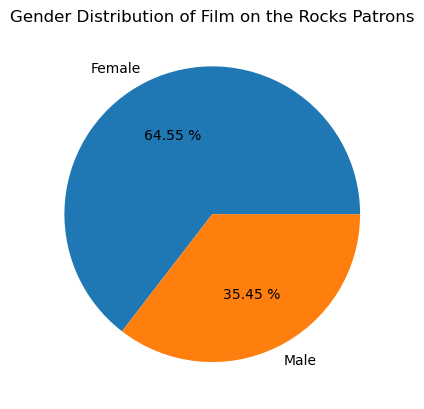

In [153]:
# Calculate the percentage of each gender category
gender_counts = Films['Gender'].value_counts()
total_patrons = Films.shape[0]
gender_percentage = (gender_counts / total_patrons) * 100

# Plotting the pie chart
plt.pie(gender_percentage, labels=gender_percentage.index, autopct='%0.2f %%')
plt.title('Gender Distribution of Film on the Rocks Patrons')
plt.show()


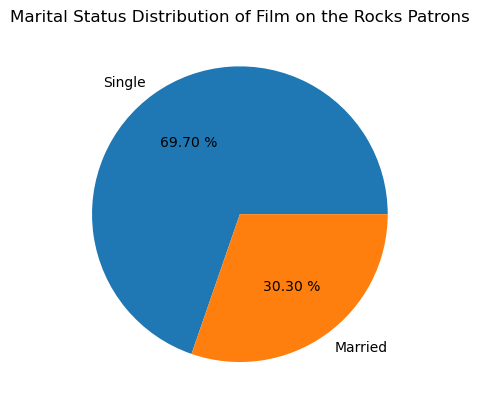

In [154]:
# Calculate the percentage of each marital status category
marital_status_counts = Films['Marital_Status'].value_counts()
total_patrons = Films.shape[0]
marital_status_percentage = (marital_status_counts / total_patrons) * 100

# Plotting the pie chart
plt.pie(marital_status_percentage, labels=marital_status_percentage.index, autopct='%0.2f %%')
plt.title('Marital Status Distribution of Film on the Rocks Patrons')
plt.show()


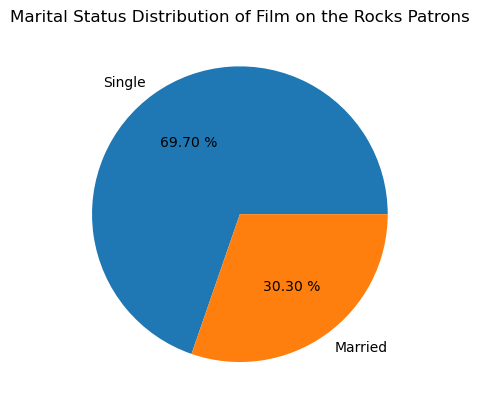

In [161]:
# Calculate the percentage of each marital status category
marital_status_counts = Films['Marital_Status'].value_counts()
total_patrons = Films.shape[0]
marital_status_percentage = (marital_status_counts / total_patrons) * 100

# Plotting the pie chart
plt.pie(marital_status_percentage, labels=marital_status_percentage.index, autopct='%0.2f %%')
plt.title('Marital Status Distribution of Film on the Rocks Patrons')
plt.show()


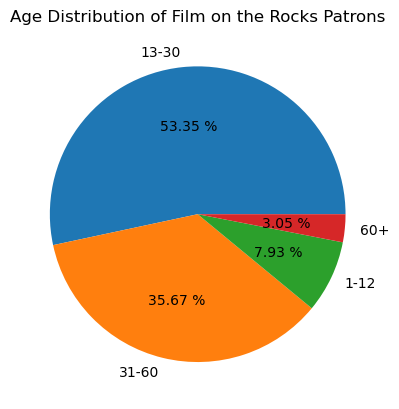

In [162]:
# Calculate the percentage of each age category
age_counts = Films['Age'].value_counts()
total_patrons = Films.shape[0]
age_percentage = (age_counts / total_patrons) * 100

# Plotting the pie chart
plt.pie(age_percentage, labels=['13-30', '31-60', '1-12', '60+'], autopct='%0.2f %%')
plt.title('Age Distribution of Film on the Rocks Patrons')
plt.show()


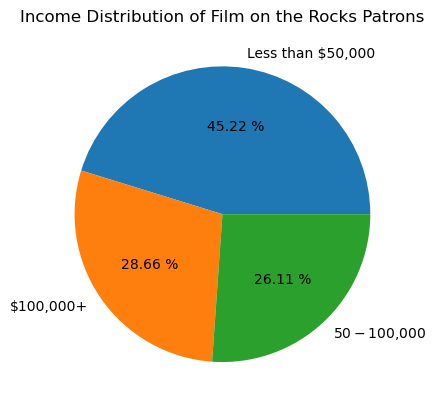

In [163]:
# Calculate the percentage of each income category
income_counts = Films['Income'].value_counts()
total_patrons = Films.shape[0]
income_percentage = (income_counts / total_patrons) * 100

# Plotting the pie chart
plt.pie(income_percentage, labels=['Less than $50,000', '$100,000+', '$50-$100,000'], autopct='%0.2f %%')
plt.title('Income Distribution of Film on the Rocks Patrons')
plt.show()


##### d) In what media outlet(s) should the film series be advertised?

In [179]:
value = Films['Hear_About'].value_counts().reset_index().iloc[0, 0]
value

'5'

In [184]:
# 5 means 'word of mouth'.the film series that should be advertised by 'word of mouth'